In [2]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
# from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import cross_val_score


### READING THE DATA

In [3]:
#Readind data
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape 

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### DATA PREPROCESSING
#### DROPPING UNNECESSARY FEATURES

In [12]:
data.drop(['Loan_ID','Gender','Education'],axis=1,inplace=True)

In [13]:
data.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### CHECK FOR NULL VALUES

In [14]:
data.isnull().sum()

Married               3
Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### FILLING NULL VALUES

In [16]:
data.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [19]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [21]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [22]:
data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [24]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [28]:
data.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [30]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)


In [32]:
data.Credit_History.unique()

array([ 1.,  0., nan])

In [33]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [34]:
data.isnull().sum()

Married              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### CHECK FOR DUPLICATES

In [35]:
data.duplicated().sum()

1

In [36]:
data.drop_duplicates(keep='first',inplace=True)
data.duplicated().sum()

0

In [37]:
data.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Yes,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Yes,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Yes,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,No,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## DATA VISUALIZATION

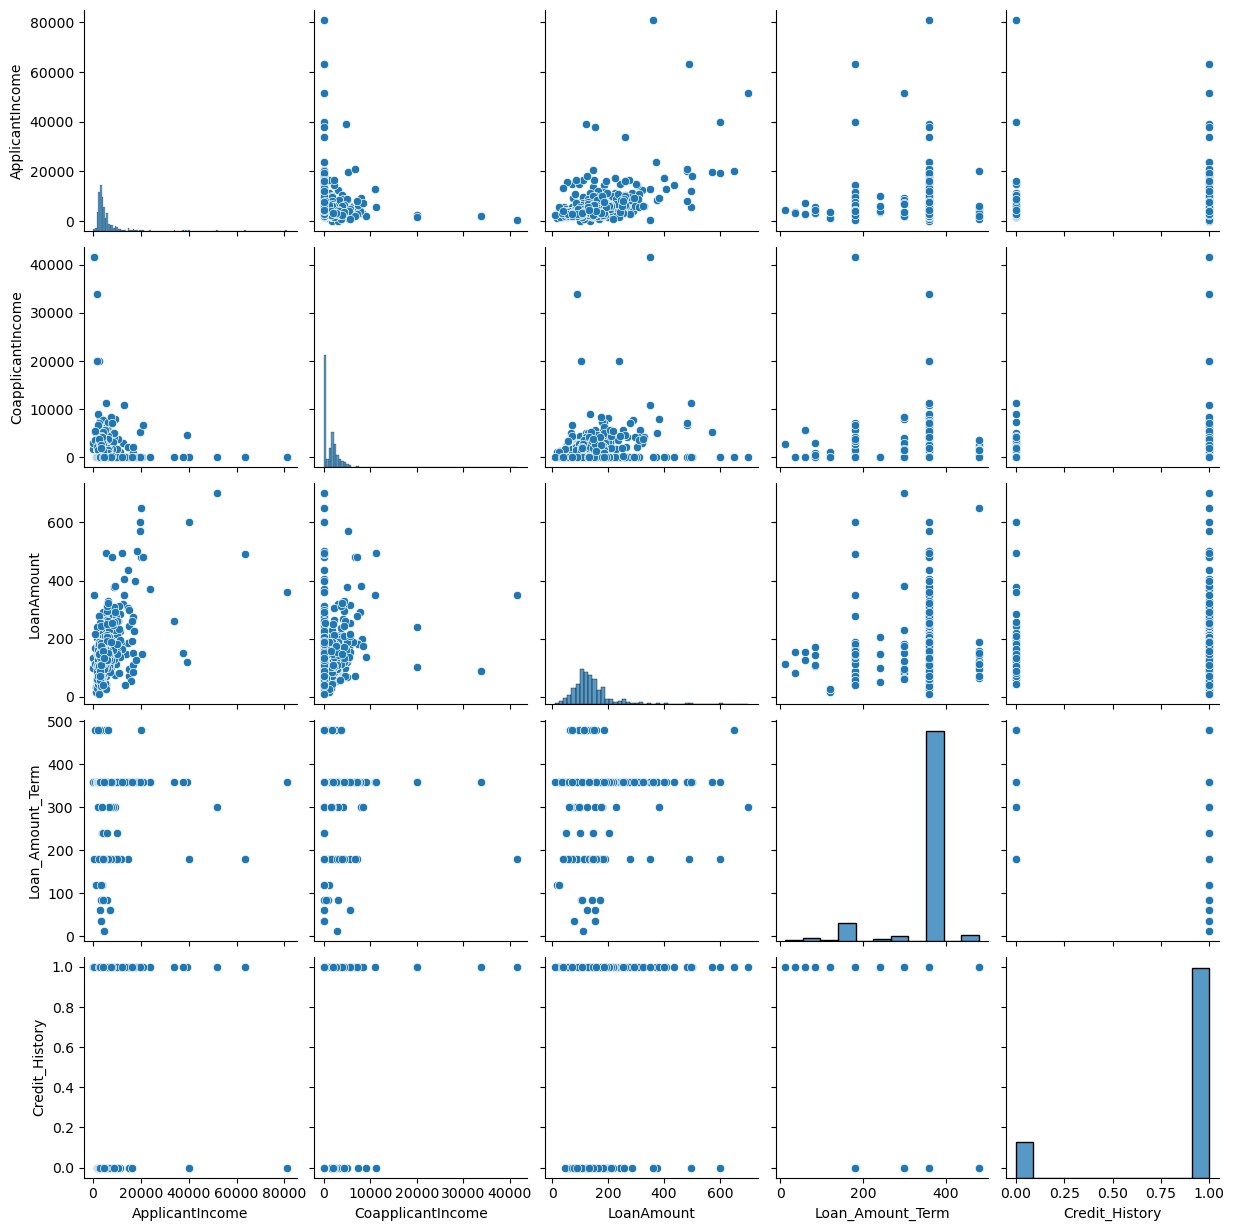

In [38]:
sns.pairplot(data)

### FEATURE EXTRACTION

In [39]:
column=['Married','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in column:
    data[i] = le.fit_transform(data[i])

In [40]:
data.Dependents=data.Dependents.replace('3+',3)

<AxesSubplot:>

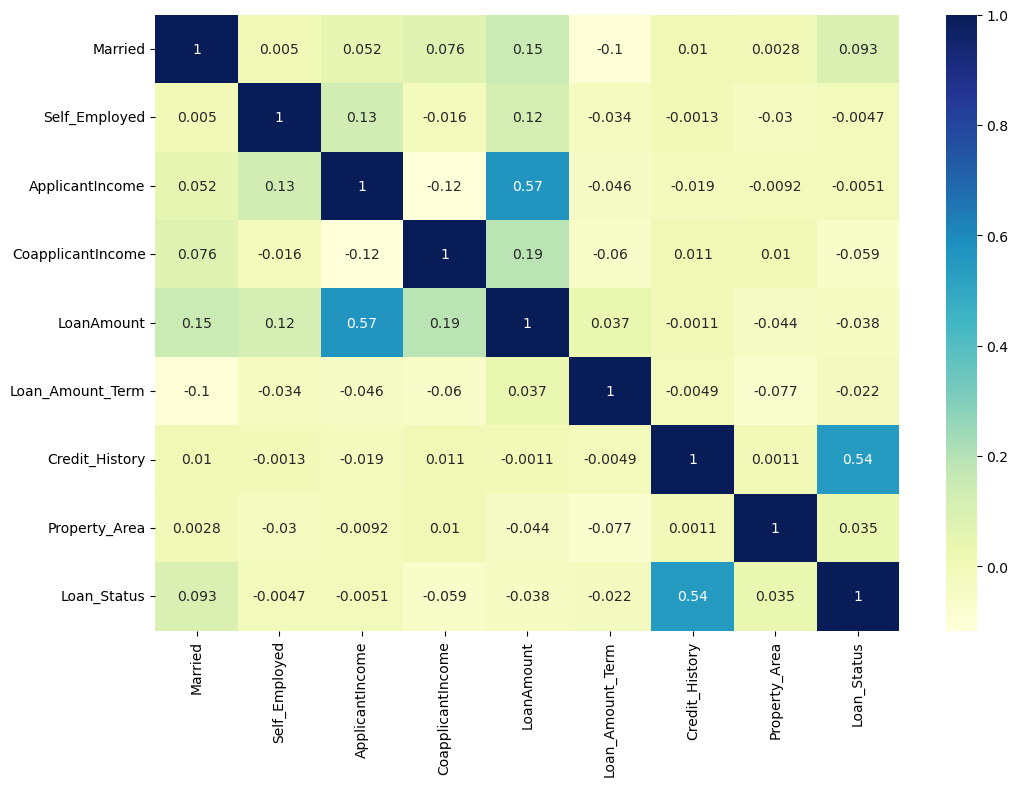

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

### SPLITING THE DATASET

In [44]:
x=data.drop('Loan_Status',axis=1)
y=data.Loan_Status

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [46]:
x_test

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
69,0,0,0,4300,0.000000,136.0,360.0,0.0,1
282,1,2,0,2301,985.799988,78.0,180.0,1.0,2
43,1,0,0,3941,2336.000000,134.0,360.0,1.0,1
376,1,3,0,8750,4996.000000,130.0,360.0,1.0,0
502,1,2,0,4865,5624.000000,208.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...
293,0,0,0,5417,0.000000,143.0,480.0,0.0,2
16,0,1,0,3596,0.000000,100.0,240.0,1.0,2
441,1,0,0,7901,1833.000000,180.0,360.0,1.0,0
239,1,1,0,3315,0.000000,96.0,360.0,1.0,1


## FEATURE SCALING

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(x_train)
X_test = sc.transform(x_test)

### Model 

### SVM

In [66]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8455284552845529


In [68]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8514851485148515
Recall: 0.9555555555555556


## Logistic Rgression

In [70]:
#import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)


Logistic Regression model accuracy (in %): 96.49122807017544
